<a href="https://colab.research.google.com/github/audreymoreira/ENEM_2017_Geopandas/blob/main/Vistas_do_ENEM_2017_(com_Geopandas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ENEM 2017 - ANÁLISE DOS MICRODADOS COM LOCALIZAÇÃO GEOGRÁFICA
## Trabalho em andamento
### Audrey Moreira

Imports

In [9]:
import dask
import dask.dataframe as dd
import zipfile
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt

### Começo do tratamento: A aquisição do arquivo de dados no processo que nos permite analisar seu conteúdo. O arquivo tem um pouco mais de 3GB.
### Fiz upload do arquivo .zip, escolhi as colunas que permitem uma análise inicial para reduzir a carga na memória.  

In [10]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    print(*z.namelist(),sep="\n")

MICRODADOS_ENEM_2017.csv


In [11]:
colunas =['TP_ESCOLA', 
          'NO_MUNICIPIO_PROVA', 
          'SG_UF_PROVA',
          'NO_MUNICIPIO_ESC', 
          'SG_UF_ESC', 
          'NU_NOTA_CN',
          'NU_NOTA_CH',
          'NU_NOTA_LC',
          'NU_NOTA_MT',
          'NU_NOTA_REDACAO',
          ]

dtype={'TP_ESCOLA': 'str',
       'NO_MUNICIPIO_PROVA': 'str',
       'SG_UF_PROVA': 'str',
       'NO_MUNICIPIO_ESC': 'str',
       'SG_UF_ESC': 'str',
       'NU_NOTA_CN': 'float16',
       'NU_NOTA_CH': 'float16',
       'NU_NOTA_LC': 'float16',
       'NU_NOTA_MT': 'float16',
       'NU_NOTA_REDACAO': 'float16',
       }

In [12]:
with zipfile.ZipFile('/content/drive/MyDrive/COLAB_DADOS/MICRODADOS_ENEM_2017.zip') as z:
    with z.open('MICRODADOS_ENEM_2017.csv') as f:
        enem_2017 = pd.read_csv(f,sep=';',encoding='ISO-8859-1',usecols=colunas,dtype=dtype)


### Este é o principal dataset: Este dataframe tem esta dimensão:

In [13]:
enem_2017.shape

(6731278, 10)

# Cálculo da NOTA FINAL: é a média aritmética das notas em Ciências Naturais, Ciências Humanas, Linguagem e Códigos, Matemática e Redação.

In [15]:
enem_2017['NOTA_FINAL'] = (enem_2017['NU_NOTA_CN'] + enem_2017['NU_NOTA_CH'] + enem_2017['NU_NOTA_LC'] + enem_2017['NU_NOTA_MT'] + enem_2017['NU_NOTA_REDACAO']) / 5

In [16]:
enem_2017

,TP_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,1,NaN,NaN,Araraquara,SP,445.50,589.00,621.5,465.50,560.0,536.50
1,1,NaN,NaN,Cassilândia,MS,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,São Paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,Lages,SC,604.00,610.50,564.0,591.00,580.0,589.50
4,1,NaN,NaN,Maceió,AL,482.00,569.00,571.0,584.50,580.0,557.00
...,...,...,...,...,...,...,...,...,...,...,...
6731273,3,São Paulo,SP,São Paulo,SP,520.00,571.00,558.5,578.00,680.0,581.50
6731274,1,NaN,NaN,Jaraguá,GO,NaN,NaN,NaN,NaN,NaN,NaN
6731275,2,Rio de Janeiro,RJ,Rio de Janeiro,RJ,461.25,424.25,431.5,407.50,540.0,452.75
6731276,1,NaN,NaN,Contagem,MG,541.00,587.00,528.5,479.25,0.0,427.25


# A distribuição de NOTAS FINAIS com todos os dados:

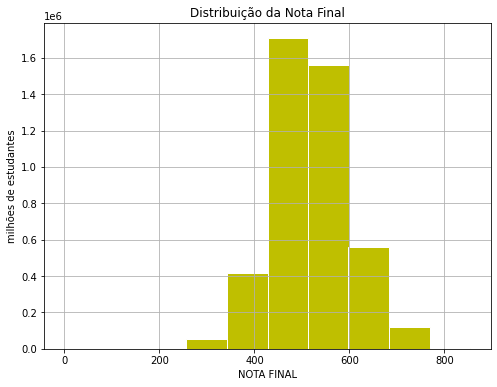

In [17]:
plt.figure(figsize = (8, 6))
plt.xlabel('NOTA FINAL')
plt.ylabel('milhões de estudantes')
plt.title('Distribuição da Nota Final')
enem_2017['NOTA_FINAL'].hist(color='y', edgecolor="white", bins=10)

# A mediana de NOTA FINAL é:

In [20]:
enem_2017['NOTA_FINAL'].median()


514.0

# A ausência dos alunos é significativa: mais de dois milhões de alunos não fizeram as provas em 2017.

In [21]:
enem_2017.isnull().sum()

TP_ESCOLA                   0
NO_MUNICIPIO_ESC      4945397
SG_UF_ESC             4945397
NO_MUNICIPIO_PROVA          0
SG_UF_PROVA                 0
NU_NOTA_CN            2293781
NU_NOTA_CH            2029913
NU_NOTA_LC            2029913
NU_NOTA_MT            2293781
NU_NOTA_REDACAO       2029913
NOTA_FINAL            2304586
dtype: int64

# A maior NOTA FINAL no ENEM 2017 foi:

In [22]:
nota_maxima = enem_2017['NOTA_FINAL'].max()
nota_maxima

855.0

# E foi obtida por um estudante com estes dados:

In [23]:
enem_2017.loc[enem_2017['NOTA_FINAL'] == nota_maxima]

,TP_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
668502,3,Curitiba,PR,São José dos Pinhais,PR,853.0,831.5,724.0,927.5,940.0,855.0


# Observando o comportamento da NOTA FINAL por ESTADOS

In [21]:
media_por_estado = enem_2017.groupby('SG_UF_PROVA').mean()
media_por_estado = media_por_estado.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
media_por_estado = media_por_estado.sort_values(by='NOTA_FINAL', ascending=False).reset_index()
media_por_estado

,SG_UF_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,SC,537.00,537.50
1,RJ,548.50,536.50
2,MG,545.50,535.50
3,SP,534.00,534.50
4,RS,536.50,533.00
5,DF,541.50,532.50
6,PR,526.00,531.00
7,ES,534.00,529.50
8,GO,531.00,521.00
9,MS,508.25,513.50


<function matplotlib.pyplot.show(*args, **kw)>

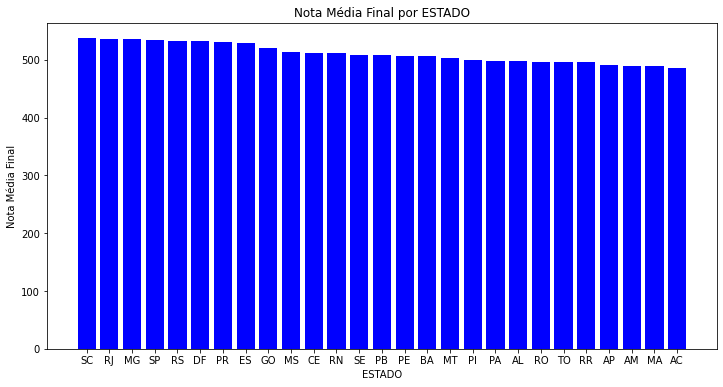

In [22]:
var_x = media_por_estado['SG_UF_PROVA']
var_y = media_por_estado['NOTA_FINAL']
plt.figure(figsize = (12, 6))
plt.bar(var_x, var_y,color='blue', width=0.8)
plt.xlabel('ESTADO')
plt.ylabel('Nota Média Final')
plt.title('Nota Média Final por ESTADO')
plt.show

In [24]:
media_por_cidade = enem_2017.groupby(['NO_MUNICIPIO_PROVA']).mean()
media_por_cidade = media_por_cidade.dropna()
media_por_cidade.info()
media_por_cidade.sample(10).reset_index()

<class 'pandas.core.frame.DataFrame'>
Index: 1690 entries, Abaetetuba to Óbidos
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_NOTA_CN       1690 non-null   float16
 1   NU_NOTA_CH       1690 non-null   float16
 2   NU_NOTA_LC       1690 non-null   float16
 3   NU_NOTA_MT       1690 non-null   float16
 4   NU_NOTA_REDACAO  1690 non-null   float16
 5   NOTA_FINAL       1690 non-null   float16
dtypes: float16(6)
memory usage: 33.0+ KB


,NO_MUNICIPIO_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,Lontra,488.75,492.50,483.25,490.25,475.75,488.00
1,Caririaçu,492.50,492.50,482.25,495.00,502.25,494.50
2,Telêmaco Borba,504.50,513.50,508.50,504.75,491.50,506.75
3,Urucurituba,476.00,465.25,461.00,457.50,432.00,460.25
4,Porto Acre,474.50,470.50,466.00,462.25,452.25,467.00
5,Catolé do Rocha,492.75,493.00,483.25,489.50,514.00,496.25
6,Conceição do Jacuípe,489.75,492.00,490.00,484.75,494.25,492.50
7,Canto do Buriti,481.00,481.50,467.00,475.50,474.50,478.75
8,Governador Mangabeira,483.75,480.50,473.50,468.50,473.25,477.75
9,Cachoeiro de Itapemirim,520.50,526.00,514.00,530.50,549.50,530.00


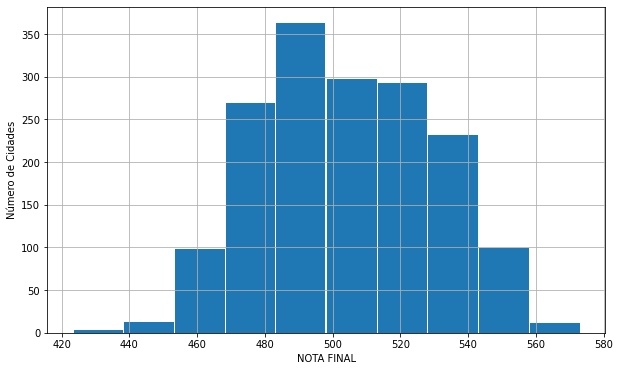

In [25]:
plt.figure(figsize = (10, 6))
plt.xlabel('NOTA FINAL')
plt.ylabel('Número de Cidades')
#plt.title('Distribuição da Nota Média Final por Cidades')
media_por_cidade['NOTA_FINAL'].hist(edgecolor="white", bins=10)

In [26]:
dez_melhores_cidades = media_por_cidade.nlargest(10, 'NOTA_FINAL')
dez_melhores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=False).head(10)
dez_melhores_cidades = dez_melhores_cidades.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
dez_melhores_cidades.reset_index()

,NO_MUNICIPIO_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,Valinhos,583.5,573.0
1,Florianópolis,568.0,568.0
2,Niterói,598.0,567.5
3,Arroio do Meio,598.0,564.5
4,Nova Petrópolis,585.5,563.0
5,Vinhedo,563.5,561.5
6,Lajeado,583.5,561.0
7,São José dos Campos,572.5,560.5
8,Veranópolis,614.0,559.5
9,Nova Friburgo,596.0,558.0


In [27]:
dez_piores_cidades = media_por_cidade.sort_values(by='NOTA_FINAL', ascending=True).head(10)
dez_piores_cidades = dez_piores_cidades.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
dez_piores_cidades.reset_index()

,NO_MUNICIPIO_PROVA,NU_NOTA_REDACAO,NOTA_FINAL
0,Benjamin Constant,330.50,423.25
1,Santo Antônio do Içá,333.00,423.75
2,São Paulo de Olivença,315.75,423.75
3,Japurá,360.75,435.00
4,Tonantins,388.25,440.75
5,Uarini,384.75,441.75
6,Anamã,371.50,444.75
7,São Félix do Araguaia,369.25,444.75
8,Itacajá,378.50,445.00
9,Maraã,367.75,446.00


## Investigando a relação entre TER INTERNET em casa e NOTA DE REDAÇÃO e NOTA FINAL.

In [29]:
enem_2017

,TP_ESCOLA,NO_MUNICIPIO_ESC,SG_UF_ESC,NO_MUNICIPIO_PROVA,SG_UF_PROVA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,1,NaN,NaN,Araraquara,SP,445.50,589.00,621.5,465.50,560.0,536.50
1,1,NaN,NaN,Cassilândia,MS,NaN,NaN,NaN,NaN,NaN,NaN
2,1,NaN,NaN,São Paulo,SP,NaN,NaN,NaN,NaN,NaN,NaN
3,1,NaN,NaN,Lages,SC,604.00,610.50,564.0,591.00,580.0,589.50
4,1,NaN,NaN,Maceió,AL,482.00,569.00,571.0,584.50,580.0,557.00
...,...,...,...,...,...,...,...,...,...,...,...
6731273,3,São Paulo,SP,São Paulo,SP,520.00,571.00,558.5,578.00,680.0,581.50
6731274,1,NaN,NaN,Jaraguá,GO,NaN,NaN,NaN,NaN,NaN,NaN
6731275,2,Rio de Janeiro,RJ,Rio de Janeiro,RJ,461.25,424.25,431.5,407.50,540.0,452.75
6731276,1,NaN,NaN,Contagem,MG,541.00,587.00,528.5,479.25,0.0,427.25


In [91]:
internet_e_nota_final = enem_2017.groupby('Q025').mean().reset_index()
internet_e_nota_final

,Q025,IDHM(2017),IDHM Renda(2017),NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO,NOTA_FINAL
0,A,0.744608,0.819522,485.75,488.5,483.5,479.0,467.25,483.0
1,B,0.770876,0.837613,521.50,531.5,521.5,535.0,546.00,533.5


In [92]:

internet_e_nota_final.rename(columns = {'Q025':'CASA_COM_INTERNET'}, inplace = True)
internet_e_nota_final['CASA_COM_INTERNET'] = internet_e_nota_final['CASA_COM_INTERNET'].map({
    'A':'NÃO',
    'B':'SIM'},)
internet_e_nota_final = internet_e_nota_final.drop(['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT'], axis=1)
internet_e_nota_final

,CASA_COM_INTERNET,IDHM(2017),IDHM Renda(2017),NU_NOTA_REDACAO,NOTA_FINAL
0,NÃO,0.744608,0.819522,467.25,483.0
1,SIM,0.770876,0.837613,546.00,533.5


#### Ter INTERNET aumenta a NOTA FINAL em 50.5 pontos.
#### Ter INTERNET aumenta a nota da REDAÇÃO em 78.75 pontos. 
#### Podemos observar que a diferença na nota da REDAÇÃO é maior que a diferença na NOTA FINAL, ter INTERNET em casa é muito importante.

#### Este é um trabalho em andamento.
#### Mais desenvolvimentos envolvem, por exemplo, a evolução histórica das análises executadas aqui.
#### Caso você queira enviar sugestões, elas serão muito apreciadas! Obrigada!
#### Audrey Moreira